## Exercice 3 : Regression

### 3.1 Linear models for regression

In [1]:
# Setup default necessary imports
import mglearn
import numpy as np
from sklearn.model_selection import train_test_split

w[0]: 0.393906  b: -0.031804


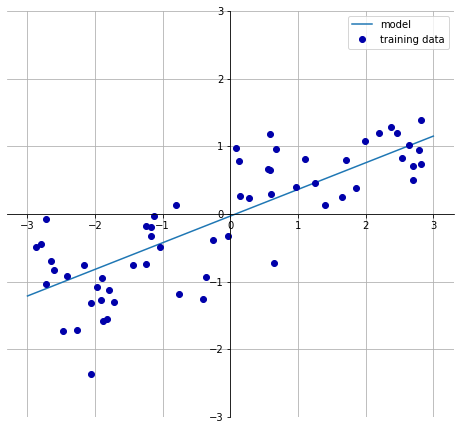

In [2]:
mglearn.plots.plot_linear_regression_wave()

In [3]:
# Train datas
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

# Check for efficiency
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))
# Bad score obtained from overfitting, we will try a more efficient model

Training set score: 0.67
Test set score: 0.66


### 3.2 Ridge Regression

In [4]:
from sklearn.linear_model import Ridge
# Test ridge regression from different parameters
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

ridge = Ridge().fit(X_train, y_train)
print("Training set score for alpha 1: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score for alpha 1: {:.2f}".format(ridge.score(X_test, y_test)))
print('-------');
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score for alpha 10: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score for alpha 10: {:.2f}".format(ridge10.score(X_test, y_test)))
print('-------');
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score for alpha 0.1: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score for alpha 0.1: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score for alpha 1: 0.89
Test set score for alpha 1: 0.75
-------
Training set score for alpha 10: 0.79
Test set score for alpha 10: 0.64
-------
Training set score for alpha 0.1: 0.93
Test set score for alpha 0.1: 0.77


c:\users\plato\onedrive\bureau\etudes\epsi\machine-learning\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets 

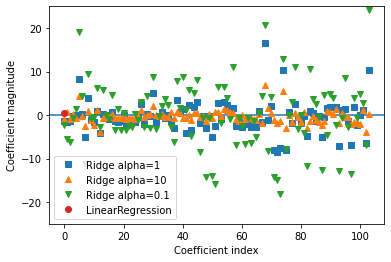

In [5]:
# Display Ridge Regression accuracy depending on alpha parameter
import matplotlib.pyplot as plt

plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

### 3.3 Linear Regression and Ridge Regression comparison

c:\users\plato\onedrive\bureau\etudes\epsi\machine-learning\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets 

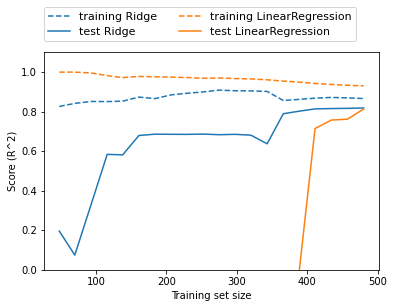

In [6]:
mglearn.plots.plot_ridge_n_samples()

### 3.4 Lasso Regression

In [7]:
from sklearn.linear_model import Lasso
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso.coef_ != 0))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33
